In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

Loading data
===

ProjectAreas.csv

Every job is associated with a project ID (Area0 - Area60). This dataset provides the mapping of project ID to its domain science. For example, Area0 stands for Accelerator Physics which comes under the 'Physics' domain. Similarly, there are other areas, like Area3 (Astrophysics) and Area25 (Lattice Guage Theory) which are also classified under the Physics domain.

2015-2019.csv

These are the resource utilization datasets from the Titan supercompter at Oak Ridge National Laboratory for the years 2015-2019. Every file is associated with a header and each row corresponds to the total resource utilization statistics of a job that ran on Titan. The most important features are:
1. user_id: The used who submitted the job.
2. start_time: The timestamp when the job started.
3. end_time: The timestamp when the job ended.
4. stime, utime: The CPU time in Titan
5. alps_exit: status field - if a job runs successfully, only then job return status is zero
6. command: The executable of the job. The format is "/lustre/fileSystem/ProjectID-ProjectNumber/Application". For Titan, there were three different file system types under Lustre - atlas, atlas1 and atlas2. Jobs could select any one. 

Example: /lustre/atlas/User1027/Area8-7/acemd_2019.bin - The application 'acemd_2019.bin' belonged to project ID 'Area8' with the project Number '7'. User1027 submitted this job which ran on the 'atlas' file system in Lustre. 
Many commands do not have the file system or the user or the project information. 
Project ID is mapped to a domain science in the ProjectAreas.csv dataset. 

7. node_count: Number of nodes that the job ran.
8. max_rss: Estimate of the maximum resident CPU memory used by an individual compute node through the lifespan of a job run.
(Each Titan compute node is equipped with a 16-core CPU with a total of 32 GiB CPU memory, and every CPU is paired with a single GPU with a 6 GiB GPU memory.)
9. rchar, wchar: Bytes read and bytes written per process.
10. gpu_mode: Indicates how GPUs are used.  The GPU is in an exclusive mode, if only one process can operate a context to the GPU. An application can request the default mode, where multiple processes can communicate with a GPU.
11. gpu_secs: Time spent on GPUs by the job.
12. gpu_maxmem: Maximum GPU memory used by all the nodes.
13. gpu_summem: Total GPU memory used by all the nodes.

For better understanding of the RUR dataset, please read the paper:
[1] Feiyi Wang, Sarp Oral, Satyabrata Sen, and Neena Imam. "Learning from Five-year Resource-Utilization Data of Titan System." In 2019 IEEE International Conference on Cluster Computing (CLUSTER), pp. 1-6. IEEE, 2019.

In [2]:
df = pd.read_csv("TitanRUR/2015.csv")
project_areas = pd.read_csv("TitanRUR/ProjectAreas.csv")

In [3]:
df.columns

Index(['user_id', 'start_time', 'end_time', 'stime', 'utime', 'alps_exit',
       'alps_nppn', 'alps_width', 'alps_resid', 'aprun_id', 'command',
       'node_count', 'max_rss', 'rchar', 'wchar', 'gpu_mode', 'gpu_pids',
       'gpu_secs', 'gpu_maxsecs', 'gpu_maxmem', 'gpu_summem'],
      dtype='object')

In [8]:
df['gpu_pids']

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
1529916    0.0
1529917    0.0
1529918    0.0
1529919    0.0
1529920    0.0
Name: gpu_pids, Length: 1529921, dtype: float64

In [30]:
df.describe()

,stime,utime,alps_exit,alps_nppn,alps_width,alps_resid,aprun_id,node_count,max_rss,rchar,wchar,gpu_pids,gpu_secs,gpu_maxsecs,gpu_maxmem,gpu_summem
count,1.529112e+06,1.529112e+06,1.529921e+06,1.529700e+06,1.529703e+06,1.529921e+06,1.529921e+06,1.529921e+06,1.529112e+06,1.529112e+06,1.529112e+06,1.529112e+06,1.529112e+06,1.529112e+06,1.529112e+06,1.529112e+06
mean,2.521794e+10,7.622465e+11,2.263631e+01,1.593743e+00,4.119682e+02,1.530632e+05,9.000935e+06,8.722173e+01,6.973078e+05,1.410559e+11,8.407141e+10,2.952354e-01,5.283943e+04,4.747477e+04,2.748933e+08,5.357871e+10
std,8.766027e+11,3.964473e+13,5.165643e+01,4.019295e+00,3.812720e+03,7.597544e+04,4.580114e+05,7.003137e+02,2.192099e+06,9.544548e+12,3.145000e+12,5.147740e-01,2.071519e+06,1.860002e+06,8.300327e+08,1.284850e+12
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.880000e+02,8.132360e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.480000e+05,3.720000e+05,0.000000e+00,0.000000e+00,1.000000e+00,8.359400e+04,8.597321e+06,1.000000e+00,8.200000e+03,9.515600e+04,1.208600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.071600e+07,6.628000e+07,0.000000e+00,0.000000e+00,8.000000e+00,1.636310e+05,9.057275e+06,1.000000e+00,1.064040e+05,1.262370e+07,9.007610e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.448218e+09,1.737929e+10,0.000000e+00,1.000000e+00,9.600000e+01,2.236980e+05,9.420212e+06,1.600000e+01,3.799800e+05,1.498981e+09,3.364376e+08,1.000000e+00,0.000000e+00,0.000000e+00,9.922150e+07,1.152123e+08
max,6.301743e+14,2.082910e+16,2.550000e+02,1.600000e+01,2.989760e+05,2.644340e+05,9.698388e+06,1.868800e+04,3.062029e+07,7.433628e+15,1.828464e+15,4.900000e+01,5.973608e+08,4.710373e+08,6.579028e+09,1.217786e+14


In [9]:
# Get the code for ML area

project_areas[project_areas['Science'] == ("Machine Learning")]

,ID,Area,Science
26,Area26,Machine Learning,Machine Learning


In [10]:
# Check how many jobs in 2015 are of ML

df['command'].str.contains("Area26").sum()

0

There are jobs marked as ML jobs as such

In [27]:
del df

Helios Data
===

In [3]:
helios = pd.read_csv("HeliosData/data/Venus/cluster_log.csv")
gpu_info = pd.read_csv("HeliosData/data/Venus/cluster_gpu_number.csv")

In [4]:
helios.shape

(246708, 12)

In [3]:
helios.columns

Index(['job_id', 'user', 'vc', 'gpu_num', 'cpu_num', 'node_num', 'state',
       'submit_time', 'start_time', 'end_time', 'duration', 'queue'],
      dtype='object')

<AxesSubplot:>

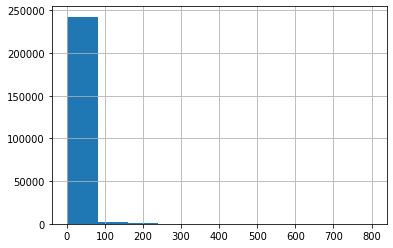

In [10]:
helios['cpu_num'].hist()

In [7]:
# TODO: Filter to completed jobs

helios['state']

0           TIMEOUT
1           TIMEOUT
2            FAILED
3         COMPLETED
4           TIMEOUT
            ...    
246703    COMPLETED
246704    COMPLETED
246705    COMPLETED
246706    COMPLETED
246707    CANCELLED
Name: state, Length: 246708, dtype: object

In [5]:
gpu_info

,date,vcEwI,vcWoR,vcHvQ,vcvGl,vc8Gr,vcKeu,vcKrE,vcYVn,vchbv,...,vcefl,vcvlY,vcIya,vcOhe,vccJW,vc6YE,vcgkz,vcEhP,vcbIW,total
0,2020-04-01,72,64,64,80,48,0,32,0,72,...,80,64,0,56,32,88,8,0,0,968
1,2020-04-02,72,64,64,80,48,0,32,0,72,...,80,64,0,56,32,88,8,0,0,968
2,2020-04-03,72,64,64,80,48,0,32,0,72,...,80,64,0,56,32,88,8,0,0,968
3,2020-04-04,72,64,64,80,48,0,32,0,72,...,80,64,0,56,32,88,8,0,0,968
4,2020-04-05,72,64,64,80,48,0,32,0,72,...,80,64,0,56,32,88,8,0,0,968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2020-09-24,72,40,64,160,48,88,32,88,32,...,80,16,0,0,0,0,8,8,0,1080
177,2020-09-25,72,40,64,160,48,88,32,88,32,...,80,16,0,0,0,0,8,8,0,1080
178,2020-09-26,72,40,64,160,48,88,32,88,32,...,80,16,0,0,0,0,8,8,0,1080
179,2020-09-27,72,40,64,160,48,88,32,88,32,...,80,16,0,0,0,0,8,8,0,1080


In [38]:
gpu_info.columns

Index(['date', 'vcEwI', 'vcWoR', 'vcHvQ', 'vcvGl', 'vc8Gr', 'vcKeu', 'vcKrE',
       'vcYVn', 'vchbv', 'vcP2J', 'vcLTP', 'vcJLV', 'vchA3', 'vcJkd', 'vcsBT',
       'vcJsw', 'vcefl', 'vcvlY', 'vcIya', 'vcOhe', 'vccJW', 'vc6YE', 'vcgkz',
       'vcEhP', 'vcbIW', 'total'],
      dtype='object')

`gpu_info` is date-wise number of GPUs in each virtual cluster

`helios` is SLURM job list, with relevant details like nodes used, duration of job, queue position, number of GPUs used, and the Virtual Cluster used

Filtering Titan Jobs
===

In [16]:
# Completed jobs only, which use GPU, run for all years.
csv_path = "TitanRUR/2019.csv"
target_path = csv_path.replace(".csv", "_filtered.csv")


df = pd.read_csv(csv_path)
df = df[(df['alps_exit'] == 0) & (df['gpu_secs'] > 0)]
df.to_csv(target_path)

In [9]:
# Number of jobs till now in each year
for year in range(2015, 2020):
    df = pd.read_csv(f"2019_filtered.csv")

,user_id,start_time,end_time,stime,utime,alps_exit,alps_nppn,alps_width,alps_resid,aprun_id,...,node_count,max_rss,rchar,wchar,gpu_mode,gpu_pids,gpu_secs,gpu_maxsecs,gpu_maxmem,gpu_summem
0,User118,2015-03-26 18:38:16.603929,2015-03-26 23:42:40.128085,1.598528e+10,3.137974e+10,0,1.0,16.0,25048,8231766,...,16,716264.0,3.071122e+08,3.880343e+09,exclusive_process,1.0,119053.0,119053.0,3.274179e+08,3.908043e+09
1,User118,2015-03-26 18:38:16.671431,2015-03-26 23:42:40.762990,1.612195e+10,3.125179e+10,0,1.0,16.0,25048,8231769,...,16,712680.0,3.058311e+08,3.867837e+09,exclusive_process,1.0,121800.0,121800.0,2.673869e+08,3.598189e+09
2,User118,2015-03-26 18:38:16.588309,2015-03-26 23:42:41.345902,1.593606e+10,2.715182e+10,0,1.0,16.0,25048,8231767,...,16,716696.0,3.133532e+08,3.867733e+09,exclusive_process,1.0,120157.0,120157.0,2.977956e+08,3.645112e+09
3,User235,2015-03-26 23:42:09.347839,2015-03-26 23:43:01.635625,2.291600e+07,4.845400e+08,0,1.0,10.0,25329,8232719,...,10,930680.0,8.223561e+08,2.210589e+08,exclusive_process,1.0,218.0,218.0,6.755451e+08,6.755451e+09
4,User118,2015-03-26 18:38:16.295185,2015-03-26 23:43:13.928797,1.603896e+10,2.327763e+10,0,1.0,16.0,25048,8231765,...,16,717600.0,3.096806e+08,3.867504e+09,exclusive_process,1.0,123302.0,123302.0,3.303014e+08,3.886809e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529758,User100,2015-10-02 02:33:02.986549,2015-10-02 02:36:43.178475,2.554092e+09,1.835400e+10,0,1.0,96.0,216879,9339672,...,96,443000.0,1.448422e+10,1.143896e+08,exclusive_process,1.0,18944.0,18944.0,4.289987e+08,4.115871e+10
1529804,User23,2015-10-02 01:31:41.731134,2015-10-02 02:48:23.362036,3.138908e+10,1.985953e+11,0,1.0,50.0,216832,9339208,...,50,510164.0,2.172573e+09,9.768868e+09,exclusive_process,1.0,225200.0,225200.0,1.551106e+09,7.755530e+10
1529815,User475,2015-10-02 02:11:15.541665,2015-10-02 02:51:16.320751,1.363888e+11,1.889699e+13,0,0.0,8000.0,216864,9339520,...,500,261592.0,3.618415e+11,1.035376e+11,exclusive_process,1.0,562557.0,562557.0,1.165623e+09,5.795153e+11
1529832,User100,2015-10-02 02:52:15.273353,2015-10-02 02:57:25.621420,3.652104e+09,2.592280e+10,0,1.0,96.0,216898,9339782,...,96,473060.0,1.686323e+10,1.524452e+08,exclusive_process,1.0,27225.0,27225.0,4.404019e+08,4.227858e+10


### Total jobs left after filter (GPU, succeeded jobs)

1.9 million jobs are left after filtering out the non-GPU and failed jobs

In [3]:
!wc -l TitanRUR/*filtered.csv

   214873 TitanRUR/2015_filtered.csv
   262933 TitanRUR/2016_1_filtered.csv
   237768 TitanRUR/2016_2_filtered.csv
   406223 TitanRUR/2017_filtered.csv
   595453 TitanRUR/2018_filtered.csv
   230560 TitanRUR/2019_filtered.csv
  1947810 total


In [1]:
!wc -l TitanRUR/*.csv

   1529922 TitanRUR/2015.csv
    214873 TitanRUR/2015_filtered.csv
   2461798 TitanRUR/2016_1.csv
    262933 TitanRUR/2016_1_filtered.csv
   2282802 TitanRUR/2016_2.csv
    237768 TitanRUR/2016_2_filtered.csv
   4744599 TitanRUR/2016.csv
   2814839 TitanRUR/2017.csv
    406223 TitanRUR/2017_filtered.csv
   2370859 TitanRUR/2018.csv
    595453 TitanRUR/2018_filtered.csv
   1520972 TitanRUR/2019.csv
    230560 TitanRUR/2019_filtered.csv
        62 TitanRUR/ProjectAreas.csv
  19673663 total


### File sizes after filtering

In [4]:
!du -sh TitanRUR/*filtered.csv

52M	TitanRUR/2015_filtered.csv
65M	TitanRUR/2016_1_filtered.csv
57M	TitanRUR/2016_2_filtered.csv
94M	TitanRUR/2017_filtered.csv
130M	TitanRUR/2018_filtered.csv
49M	TitanRUR/2019_filtered.csv
